In [1]:
import numpy as np
from PIL import ImageFont
from generate_ascii_palette import *
from matplotlib import pyplot as plt
from statistics import mean

In [2]:
FONT = ImageFont.truetype("fonts/CascadiaMono.ttf", 16)
WINDOW_SIZE = (1,1)

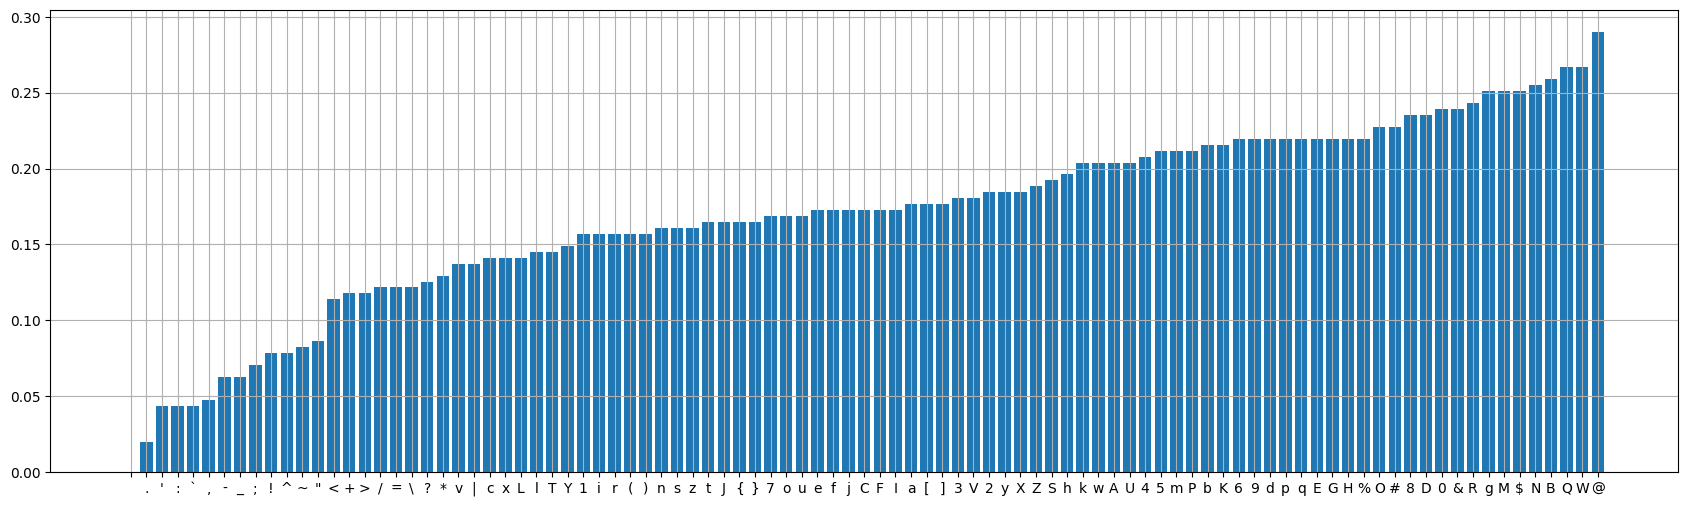

In [3]:
asciis = get_asciis()
brightness_map = generate_brightness_map(asciis, FONT, WINDOW_SIZE)
brightness = [b[0][0] for b in brightness_map.values()]
brightness = list(zip(asciis, brightness))
brightness = sorted(brightness, key=lambda a: a[1])
plt.figure(figsize=(21, 6))
plt.bar([a[0] for a in brightness], [a[1] for a in brightness])
plt.grid()

In [4]:
bins = 12
char_bins = [[] for _ in range(bins)]
bin_br = [[] for _ in range(bins)]
br_max = brightness[-1][1]
br_step = br_max / (bins-1)
for char, char_br in brightness:
    bin_index = int(round(char_br / br_step))
    char_bins[bin_index].append(char)
    bin_br[bin_index].append(char_br)

char_bins = list(filter(lambda b: len(b) > 0, char_bins))
bin_br = list(filter(lambda b: len(b) > 0, bin_br))
bin_br = list(map(mean, bin_br))

print([''.join(l) for l in char_bins])
print(bin_br)

[' ', '.', "':`,-_", ';!^~"', '<+>', '/=\\?*v|cxL', 'lTY1ir()nsztJ{}7ou', 'efjCFIa[]3V2yXZSh', 'kwAU45mPbK69dpqEGH%', 'O#8D0&R', 'gM$NBQW', '@']
[0.0, 0.0196078431372549, 0.05032679738562092, 0.0792156862745098, 0.11633986928104575, 0.13176470588235295, 0.15947712418300655, 0.17970011534025376, 0.21403508771929824, 0.23529411764705882, 0.2571428571428571, 0.2901960784313726]


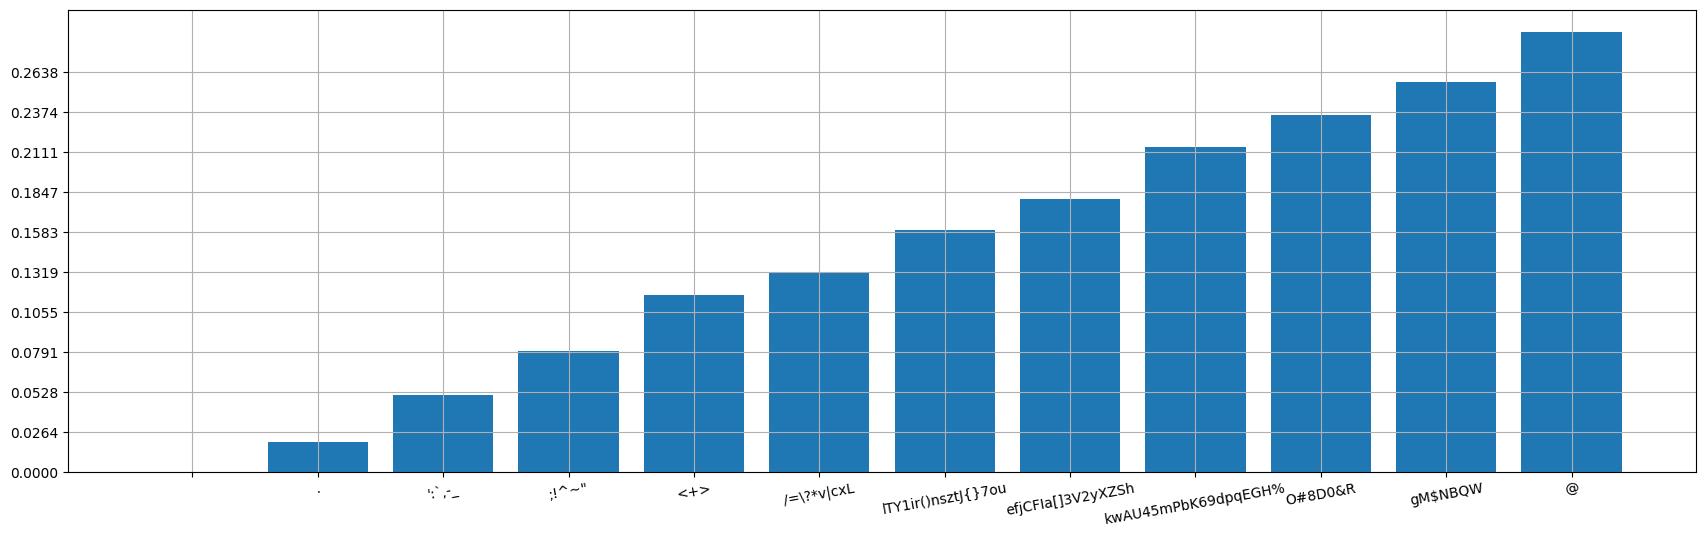

In [5]:
plt.figure(figsize=(21, 6))
plt.yticks(np.arange(0, br_max, br_step))
plt.xticks(rotation=10)
plt.bar([''.join(l) for l in char_bins], bin_br)
plt.grid()

In [6]:
char_bins, bins_br = generate_1_1_palette(get_asciis(), FONT, 12)

print(char_bins)
print(bins_br)

[[' '], ['.'], ["'", ':', '`', ',', '-', '_'], [';', '!', '^', '~', '"'], ['<', '+', '>'], ['/', '=', '\\', '?', '*', 'v', '|', 'c', 'x', 'L'], ['l', 'T', 'Y', '1', 'i', 'r', '(', ')', 'n', 's', 'z', 't', 'J', '{', '}', '7', 'o', 'u'], ['e', 'f', 'j', 'C', 'F', 'I', 'a', '[', ']', '3', 'V', '2', 'y', 'X', 'Z', 'S', 'h'], ['k', 'w', 'A', 'U', '4', '5', 'm', 'P', 'b', 'K', '6', '9', 'd', 'p', 'q', 'E', 'G', 'H', '%'], ['O', '#', '8', 'D', '0', '&', 'R'], ['g', 'M', '$', 'N', 'B', 'Q', 'W'], ['@']]
[0.0, 0.0196078431372549, 0.05032679738562091, 0.07921568627450981, 0.11633986928104574, 0.13176470588235295, 0.15947712418300652, 0.17970011534025376, 0.21403508771929827, 0.23529411764705885, 0.2571428571428571, 0.2901960784313726]
